# Lab 5: A/B Testing, Normal distributions

Welcome to Lab 5!

In [319]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. A/B Testing

A/B testing is a form of hypothesis testing that allows you to make comparisons between two distributions.

You'll almost never be explicitly asked to perform an A/B test. Make sure you can identify situations where the test is appropriate and know how to correctly implement each step.  

**Question 1.1:** The following statements are the unordered steps of an A/B hypothesis test:

1. Choose a test statistic (typically the difference in means between two categories)

2. Shuffle the labels of the original sample, find your simulated test statistic, and repeat many times

3. Find the value of the observed test statistic

4. Calculate the p-value based off your observed and simulated test statistics

5. Define a null and alternate model

6. Use the p-value and p-value cutoff to draw a conclusion about the null hypothesis

Make an integer array called `ab_test_order` that contains the correct order of an A/B test, where the first item of the array is the first step of an A/B test and the last item of the array is the last step of an A/B test

<!--
BEGIN QUESTION
name: q1_1
-->

In [320]:
ab_test_order = [5, 1, 3, 2, 4, 7]

**Question 1.2:** If the null hypothesis of an A/B test is correct, should the order of labels affect the differences in means between each group? Why do we shuffle labels in an A/B test? 

<!--
BEGIN QUESTION
name: q1_2
-->

*Write your answer here, replacing this text.*

## 2: Murder Rates

Punishment for crime has many [philosophical justifications](http://plato.stanford.edu/entries/punishment/#ThePun).  An important one is that fear of punishment may *deter* people from committing crimes.

In the United States, some jurisdictions execute people who are convicted of particularly serious crimes, such as murder.  This punishment is called the *death penalty* or *capital punishment*.  The death penalty is controversial, and deterrence has been one focal point of the debate.  There are other reasons to support or oppose the death penalty, but in this project we'll focus on deterrence.

The key question about deterrence is:

> Through our exploration, does instituting a death penalty for murder actually reduce the number of murders?

You might have a strong intuition in one direction, but the evidence turns out to be surprisingly complex.  Different sides have variously argued that the death penalty has no deterrent effect and that each execution prevents 8 murders, all using statistical arguments!  We'll try to come to our own conclusion.

#### The data

The main data source for this lab comes from a [paper](http://cjlf.org/deathpenalty/DezRubShepDeterFinal.pdf) by three researchers, Dezhbakhsh, Rubin, and Shepherd.  The dataset contains rates of various violent crimes for every year 1960-2003 (44 years) in every US state.  The researchers compiled the data from the FBI's Uniform Crime Reports.

Since crimes are committed by people, not states, we need to account for the number of people in each state when we're looking at state-level data.  Murder rates are calculated as follows:

$$\text{murder rate for state X in year Y} = \frac{\text{number of murders in state X in year Y}}{\text{population in state X in year Y}}*100000$$

(Murder is rare, so we multiply by 100,000 just to avoid dealing with tiny numbers.)

In [321]:
murder_rates = Table.read_table('crime_rates.csv').select('State', 'Year', 'Population', 'Murder Rate')
murder_rates.set_format("Population", NumberFormatter)

State,Year,Population,Murder Rate
Alaska,1960,"226,167",10.2
Alaska,1961,"234,000",11.5
Alaska,1962,"246,000",4.5
Alaska,1963,"248,000",6.5
Alaska,1964,"250,000",10.4
Alaska,1965,"253,000",6.3
Alaska,1966,"272,000",12.9
Alaska,1967,"272,000",9.6
Alaska,1968,"277,000",10.5
Alaska,1969,"282,000",10.6


Murder rates vary over time, and different states exhibit different trends. The rates in some states change dramatically from year to year, while others are quite stable. Let's plot a couple, just to see the variety.

**Question 2.1.** Draw a line plot with years on the horizontal axis and murder rates on the 
vertical axis. Include two lines: one for Alaska murder rates and one for Minnesota murder rates. Create this plot using a single call, `ak_mn.plot('Year')`.

*Hint*: To create two lines, you will need create the table `ak_mn` with two columns of murder rates, in addition to a column of years. This table will have the following structure:

| Year | Murder rate in Alaska | Murder rate in Minnesota |
|------|-----------------------|--------------------------|
| 1960 | 10.2                  | 1.2                      |
| 1961 | 11.5                  | 1                        |
| 1962 | 4.5                   | 0.9                      |

<center>... (41 rows omitted)</center>

<!--
BEGIN QUESTION
name: q2_1
-->

In [322]:
# The next lines are provided for you.  They create a table
# containing only the Alaska information and one containing
# only the Minnesota information.
ak = murder_rates.where('State', 'Alaska').drop('State', 'Population').relabeled(1, 'Murder rate in Alaska')
mn = murder_rates.where('State', 'Minnesota').drop('State', 'Population').relabeled(1, 'Murder rate in Minnesota')

# Fill in this line to make a table like the one pictured above.
ak_mn = ak.join('Year', mn)
ak_mn

Year,Murder rate in Alaska,Murder rate in Minnesota
1960,10.2,1.2
1961,11.5,1
1962,4.5,0.9
1963,6.5,1.2
1964,10.4,1.4
1965,6.3,1.4
1966,12.9,2.2
1967,9.6,1.6
1968,10.5,2.2
1969,10.6,1.9


**Question 2.2:** Using the table `ak_mn`, draw a line plot that compares the murder rate in Alaska and the murder rate in Minnesota over time.

<!--
BEGIN QUESTION
name: q2_2
-->

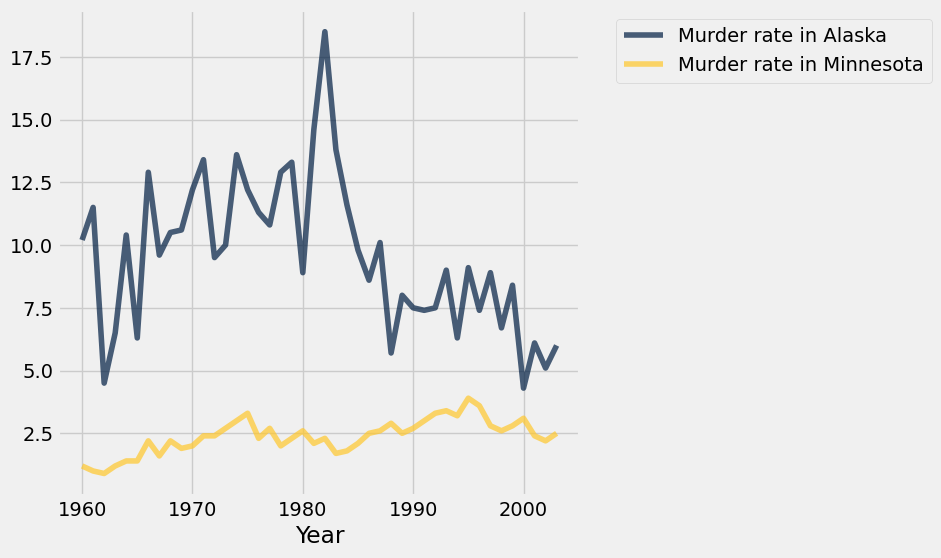

In [323]:
# Draw your line plot here
ak_mn.plot('Year')

Now what about the murder rates of other states? Say, for example, California and New York? Run the cell below to plot the murder rates of different pairs of states.

In [324]:
# Compare the murder rates of any two states by filling in the blanks below

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def state(state1, state2):
    state1_table = murder_rates.where('State', state1).drop('State', 'Population').relabeled(1, 'Murder rate in {}'.format(state1))
    state2_table = murder_rates.where('State', state2).drop('State', 'Population').relabeled(1, 'Murder rate in {}'.format(state2))
    s1_s2 = state1_table.join('Year', state2_table)
    s1_s2.plot('Year')
    plt.show()

states_array = murder_rates.group('State').column('State')

_ = interact(state,
             state1=widgets.Dropdown(options=list(states_array),value='California'),
             state2=widgets.Dropdown(options=list(states_array),value='New York')
            )

interactive(children=(Dropdown(description='state1', index=4, options=('Alabama', 'Alaska', 'Arizona', 'Arkans…

## 3. The Death Penalty

Some US states have the death penalty, and others don't, and laws have changed over time. In addition to changes in murder rates, we will also consider whether the death penalty was in force in each state and each year.

Using this information, we would like to investigate how the presence of the death penalty affects the murder rate of a state.

### A Natural Experiment

In order to attempt to investigate the causal relationship between the death penalty and murder rates, we're going to take advantage of a *natural experiment*.  A natural experiment happens when something other than experimental design applies a treatment to one group and not to another (control) group, and we have some hope that the treatment and control groups don't have any other systematic differences.

Our natural experiment is this: in 1972, a Supreme Court decision called *Furman v. Georgia* banned the death penalty throughout the US.  Suddenly, many states went from having the death penalty to not having the death penalty.

As a first step, let's see how murder rates changed before and after the court decision.  We'll define the test as follows:

> **Population:** All the states that had the death penalty before the 1972 abolition.  (There is no control group for the states that already lacked the death penalty in 1972, so we must omit them.)  This includes all US states **except** Alaska, Hawaii, Maine, Michigan, Wisconsin, and Minnesota.

> **Treatment group:** The states in that population, in 1973 (the year after 1972).

> **Control group:** The states in that population, in 1971 (the year before 1972).

> **Null hypothesis:** Murder rates in 1971 and 1973 come from the same distribution.

> **Alternative hypothesis:** Murder rates were higher in 1973 than they were in 1971.

Our alternative hypothesis is related to our suspicion that murder rates increase when the death penalty is eliminated.  

**Question 3.1:** Should we use an A/B test to test these hypotheses? If yes, what is our "A" group and what is our "B" group?

<!--
BEGIN QUESTION
name: q3_2
-->

*Write your answer here, replacing this text.*

The `death_penalty` table below describes whether each state allowed the death penalty in 1971.

In [325]:
non_death_penalty_states = make_array('Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota')

def had_death_penalty_in_1971(state):
    """Returns True if the argument is the name of a state that had the death penalty in 1971."""
    # The implementation of this function uses a bit of syntax
    # we haven't seen before.  Just trust that it behaves as its
    # documentation claims.
    return state not in non_death_penalty_states

states = murder_rates.group('State').select('State')
death_penalty = states.with_column('Death Penalty', states.apply(had_death_penalty_in_1971, 0))
death_penalty

State,Death Penalty
Alabama,True
Alaska,False
Arizona,True
Arkansas,True
California,True
Colorado,True
Connecticut,True
Delaware,True
Florida,True
Georgia,True


**Question 3.3:** Use the `death_penalty` and `murder_rates` tables to find murder rates in 1971 for **states with the death penalty before the abolition**. Create a new table `preban_rates` that contains the same information as `murder_rates`, along with a column `Death Penalty` that contains booleans (`True` or `False`) describing if states had the death penalty in 1971.

<!--
BEGIN QUESTION
name: q3_3
-->

In [326]:
# States that had death penalty in 1971
preban_rates = murder_rates.where('Year', 1971).join('State', death_penalty)
preban_rates

State,Year,Population,Murder Rate,Death Penalty
Alabama,1971,"3,479,000",15.1,True
Alaska,1971,"313,000",13.4,False
Arizona,1971,"1,849,000",6.7,True
Arkansas,1971,"1,944,000",10.5,True
California,1971,"20,223,000",8.1,True
Colorado,1971,"2,283,000",6.5,True
Connecticut,1971,"3,081,000",3.1,True
Delaware,1971,"558,000",6.1,True
Florida,1971,"7,041,000",13.3,True
Georgia,1971,"4,664,000",16,True


**Question 3.4:** Create a table `postban_rates` that contains the same information as `preban_rates`, but for 1973 instead of 1971. `postban_rates` should only contain the states found in `preban_rates`.

<!--
BEGIN QUESTION
name: q3_4
-->

In [327]:
postban_rates = murder_rates.where('Year', 1973).join('State', death_penalty)
postban_rates = postban_rates.sort("State")
postban_rates

State,Year,Population,Murder Rate,Death Penalty
Alabama,1973,"3,539,000",13.2,True
Alaska,1973,"330,000",10,False
Arizona,1973,"2,058,000",8.1,True
Arkansas,1973,"2,037,000",8.8,True
California,1973,"20,601,000",9,True
Colorado,1973,"2,437,000",7.9,True
Connecticut,1973,"3,076,000",3.3,True
Delaware,1973,"576,000",5.9,True
Florida,1973,"7,678,000",15.4,True
Georgia,1973,"4,786,000",17.4,True


**Question 3.5:** Use `preban_rates_copy` and `postban_rates` to create a table `change_in_death_rates` that contains each state's population, murder rate, and whether or not that state had the death penalty **for 1971**. 

*Hint:* `tbl_1.append(tbl_2)` with create a new table that includes rows from both `tbl_1` and `tbl_2`. Both tables must have the exactly the same columns, in the same order.

<!--
BEGIN QUESTION
name: q3_5
-->

In [328]:
preban_rates_copy = preban_rates.copy()
change_in_death_rates = preban_rates_copy.append(postban_rates).sort("State")
change_in_death_rates


State,Year,Population,Murder Rate,Death Penalty
Alabama,1971,"3,479,000",15.1,True
Alabama,1973,"3,539,000",13.2,True
Alaska,1971,"313,000",13.4,False
Alaska,1973,"330,000",10,False
Arizona,1971,"1,849,000",6.7,True
Arizona,1973,"2,058,000",8.1,True
Arkansas,1971,"1,944,000",10.5,True
Arkansas,1973,"2,037,000",8.8,True
California,1971,"20,223,000",8.1,True
California,1973,"20,601,000",9,True


Run the cell below to view the distribution of death rates during the pre-ban and post-ban time periods.

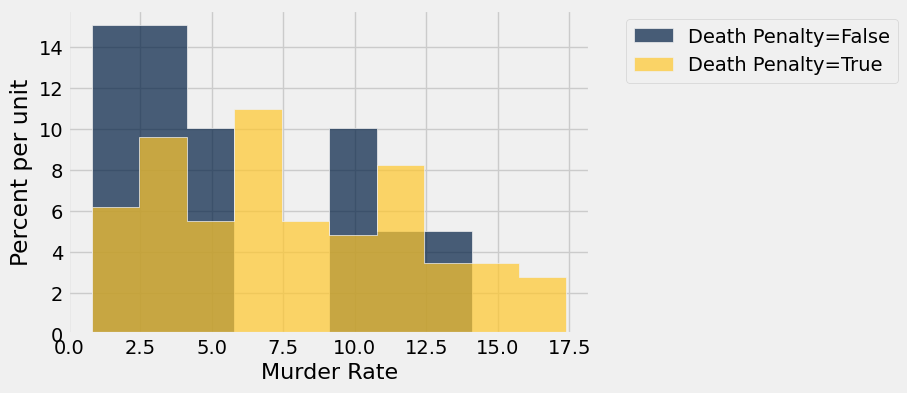

In [329]:
change_in_death_rates.hist('Murder Rate', group = 'Death Penalty')

**Question 3.6:** Create a table `rate_means` that contains the average murder rates for the states that had the death penalty and the states that didn't have the death penalty. It should have two columns: one indicating if the penalty was in place, and one that contains the average murder rate for each group.

<!--
BEGIN QUESTION
name: q3_6
-->

In [330]:
rate_means = change_in_death_rates.group('Death Penalty', np.mean).select('Death Penalty', 'Murder Rate mean')
rate_means

Death Penalty,Murder Rate mean
False,5.93333
True,7.81705


**Question 3.7:** We want to figure out if there is a difference between the distribution of death rates in 1971 and 1973. Specifically, we want to test if murder rates were higher in 1973 than they were in 1971. 

What should the test statistic be? How does it help us differentiate whether the data supports the null and alternative? 

<!--
BEGIN QUESTION
name: q3_7
-->

*Write your answer here, replacing this text.*

**Question 3.8:** Set `observed_difference` to the observed test statistic using the `rate_means` table 

<!--
BEGIN QUESTION
name: q3_8
-->

In [331]:
# Question 3.8
observed_difference = rate_means.column("Murder Rate mean").item(1) - rate_means.column("Murder Rate mean").item(0)
observed_difference

1.8837121031693185

**Question 3.9:** Given a table like `change_in_death_rates`, a value column `label`, and a group column `group_label`, write a function that calculates the appropriate test statistic.

<!--
BEGIN QUESTION
name: q3_9
-->

In [332]:
def find_test_stat(table, labels_col, values_col):
    means_table = table.group(labels_col, np.mean).select(labels_col, values_col + " mean")
    return means_table.column(values_col + " mean").item(1) - means_table.column(values_col + " mean").item(0)

find_test_stat(change_in_death_rates, "Death Penalty", "Murder Rate")


1.8837121031693185

When we run a simulation for A/B testing, we resample by shuffling the labels of the original sample. If the null hypothesis is true and the murder rate distributions are the same, we expect that the difference in mean death rates will be not change when "Death Penalty" labels are changed.

**Question 3.10:** Write a function `simulate_and_test_statistic` to compute one trial of our A/B test. Your function should run a simulation and return a test statistic.

Note: If you have an issue with the following questions, make sure to take a look at your answer to 3.9. Specifically, make sure that you are taking the directionality of our alternative hypothesis into account.


In [333]:
def simulate_and_test_statistic(table, labels_col, values_col):
    shuffled_labels = table.sample(with_replacement = False).column(labels_col)
    shuffled_table = table.select(values_col).with_column("Shuffled Labels", shuffled_labels)
    return find_test_stat(shuffled_table, "Shuffled Labels", values_col)

simulate_and_test_statistic(change_in_death_rates, "Death Penalty", "Murder Rate")


0.47272726813143784

**Question 3.11:** Simulate 5000 trials of our A/B test and store the test statistics in an array called `differences`

<!--
BEGIN QUESTION
name: q3_11
-->

In [334]:
# This cell might take a couple seconds to run
differences = make_array()

for i in range(5000):
    new_difference = simulate_and_test_statistic(change_in_death_rates, "Death Penalty", "Murder Rate")
    differences = np.append(differences, new_difference)
    
differences

array([-0.76780296, -0.48371217, -0.05757567, ..., -0.88143937,
        0.94621215, -0.50265145])

Run the cell below to view a histogram of your simulated test statistics plotted with your observed test statistic

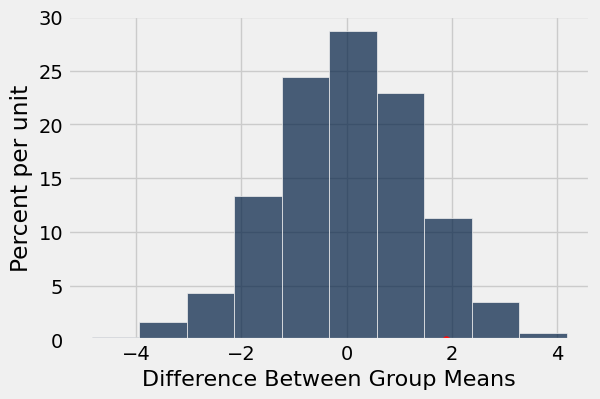

In [335]:
Table().with_column('Difference Between Group Means', differences).hist()
plt.scatter(observed_difference, 0, color='red', s=30, zorder=2);

**Question 3.12:** Find the p-value for your test and assign it to `empirical_P`

<!--
BEGIN QUESTION
name: q3_12
-->

In [336]:
empirical_P = np.count_nonzero(differences >= observed_difference) / len(differences)
empirical_P

0.0832

**Question 3.13:** Using a 5% P-value cutoff, draw a conclusion about the null and alternative hypotheses. Describe your findings using simple, non-technical language. What does your analysis tell you about murder rates after the death penalty was suspended? What can you claim about causation from your statistical analysis?

<!--
BEGIN QUESTION
name: q3_13
-->

*Write your answer here, replacing this text.*

# 4. Normal Distributions

When we visualize the distribution of a sample, we are often interested in the mean and the standard deviation of the sample (for the rest of this lab, we will abbreviate “standard deviation” as “SD”). These two summary statistics can give us a bird’s eye view of the distribution - by letting us know where the distribution sits on the number line and how spread out it is, respectively. 

We want to check if the data is linearly related, so we should look at the data.

**Question 4.1.** The next cell loads the table `births` from lecture, which is a large random sample of US births and includes information about mother-child pairs. 

Plot the distribution of mother’s ages from the table. Don’t change the last line, which will plot the mean of the sample on the distribution itself.

<!--
BEGIN QUESTION
name: q1_1
-->

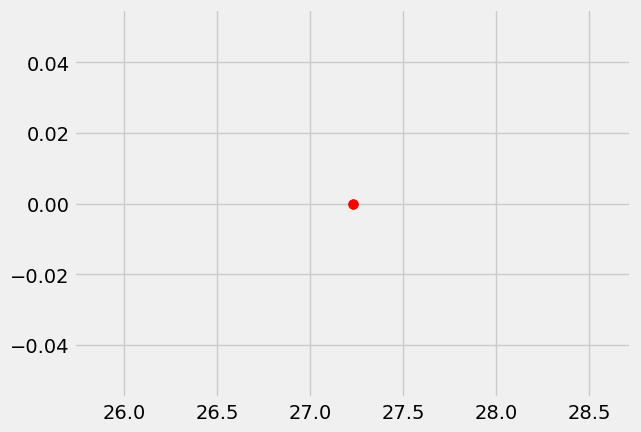

In [337]:
births = Table.read_table('baby.csv')


# Do not change this line
plt.scatter(np.mean(births.column("Maternal Age")), 0, color='red', s=50);

From the plot above, we can see that the mean is the center of gravity or balance point of the distribution. If you cut the distribution out of cardboard, and then placed your finger at the mean, the distribution would perfectly balance on your finger. Since the distribution above is right skewed (which means it has a long right tail), we know that the mean of the distribution is larger than the median, which is the “halfway” point of the data. Conversely, if the distribution had been left skewed, we know the mean would be smaller than the median.

**Question 4.2.** Run the following cell to compare the mean (red) and median (green) of the distribution of mothers ages.

<!--
BEGIN QUESTION
name: q1_2
-->

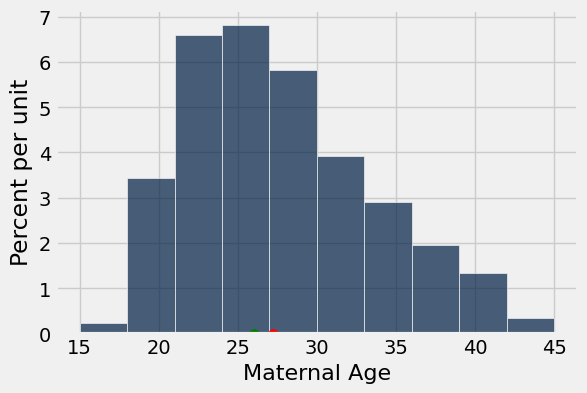

In [338]:
births.hist("Maternal Age")
plt.scatter(np.mean(births.column("Maternal Age")), 0, color='red', s=50);
plt.scatter(np.median(births.column("Maternal Age")), 0, color='green', s=50);

We are also interested in the standard deviation of mother’s ages. The SD gives us a sense of how variable mothers' ages are around the average mothers' age. If the SD is large, then the mothers' heights should spread over a large range from the mean. If the SD is small, then the mothers' heights should be tightly clustered around the average mother height. 

**The SD of an array is defined as the root mean square of deviations (differences) from average**.

Fun fact! σ (Greek letter sigma) is used to represent the SD and  μ (Greek letter mu) is used for the mean.

**Question 4.3.** Run the cell below to see the width of one SD (blue) from the sample mean (red) plotted on the histogram of maternal ages.

<!--
BEGIN QUESTION
name: q1_3
-->

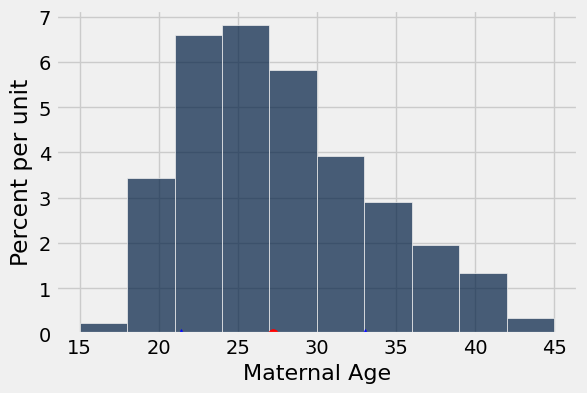

In [339]:
age_mean = np.mean(births.column("Maternal Age"))
age_sd = np.std(births.column("Maternal Age"))
births.hist("Maternal Age")

plt.scatter(age_mean, 0, color='red', s=50);
plt.scatter(age_mean+age_sd, 0, marker='^', color='blue', s=50);
plt.scatter(age_mean-age_sd, 0, marker='^', color='blue', s=50);

In this histogram, the standard deviation is not easy to identify just by looking at the graph.

However, the distributions of some variables allow us to easily spot the standard deviation on the plot. For example, if a sample follows a *normal distribution*, the standard deviation is easily spotted at the point of inflection (the point where the curve begins to change the direction of its curvature) of the distribution. 

**Question 4.4.** Fill in the following code to examine the distribution of maternal heights, which is roughly normally distributed. We’ll plot the standard deviation on the histogram, as before - notice where one standard deviation (blue) away from the mean (red) falls on the plot.

<!--
BEGIN QUESTION
name: q1_4
-->

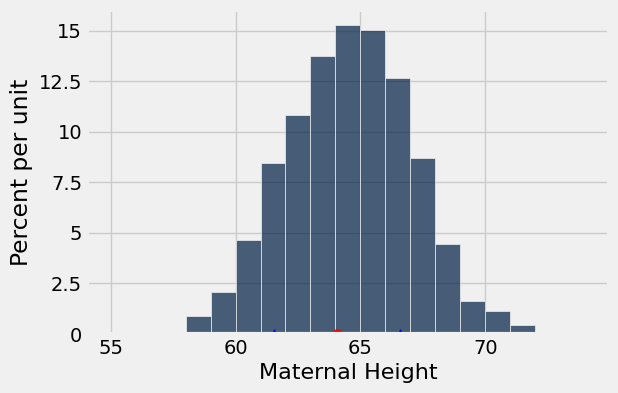

In [340]:
height_mean = np.mean(births.column("Maternal Height"))
height_sd = np.std(births.column("Maternal Height"))
births.hist("Maternal Height", bins=np.arange(55, 75, 1))

plt.scatter((height_mean), 0, color='red', s=50);
plt.scatter(height_mean+height_sd, 0, marker='^', color='blue', s=50);
plt.scatter(height_mean-height_sd, 0, marker='^', color='blue', s=50);


We don’t always know how a variable will be distributed, and making assumptions about whether or not a variable will follow a normal distribution is dangerous. However, the Central Limit Theorem defines one distribution that always follows a normal distribution. The distribution of the *sums* and *means* of many large random samples drawn with replacement from a single distribution (regardless of the distribution’s original shape) will be normally distributed. Remember that the Central Limit Theorem refers to the distribution of a *statistic* calculated from a distribution, not the distribution of the original sample or population. 

The next section will explore distributions of sample means, and you will see how the standard deviation of these distributions depends on sample sizes.

# 5. Variability of the Sample Mean

By the [Central Limit Theorem](https://www.inferentialthinking.com/chapters/14/4/Central_Limit_Theorem.html), the probability distribution of the mean of a large random sample is roughly normal. The bell curve is centered at the population mean. Some of the sample means are higher and some are lower, but the deviations from the population mean are roughly symmetric on either side, as we have seen repeatedly. Formally, probability theory shows that the sample mean is an **unbiased estimate** of the population mean.

In our simulations, we also noticed that the means of larger samples tend to be more tightly clustered around the population mean than means of smaller samples. In this section, we will quantify the [variability of the sample mean](https://www.inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) and develop a relation between the variability and the sample size.

Let's take a look at the salaries of employees of the City of San Francisco in 2014. The mean salary reported by the city government was about $75,463.92.

*Note: If you get stuck on any part of this lab, please refer to [chapter 14 of the textbook](https://www.inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html).*

In [341]:
salaries = Table.read_table('sf_salaries_2014.csv').select("salary")
salaries

salary
471953
390112
339654
326717
326233
344187
311299
310161
335485
329391


In [342]:
salary_mean = np.mean(salaries.column('salary'))
print('Mean salary of San Francisco city employees in 2014: ', salary_mean)

Mean salary of San Francisco city employees in 2014:  75463.9181402


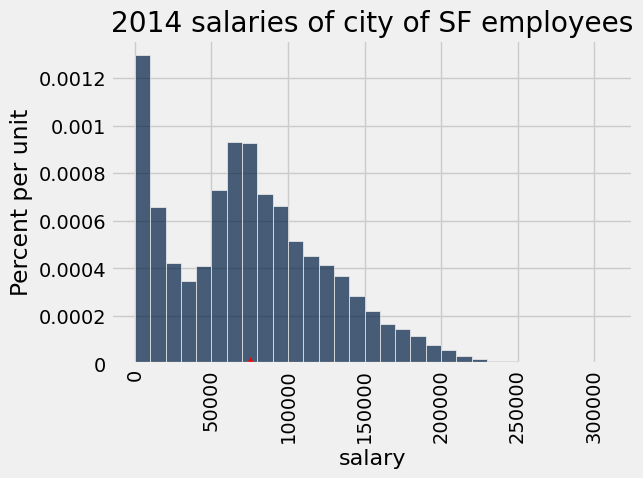

In [343]:
salaries.hist('salary', bins=np.arange(0, 300000+10000*2, 10000))
plt.scatter(salary_mean, 0, marker='^', color='red', s=100);
plt.title('2014 salaries of city of SF employees');

Clearly, the population does not follow a normal distribution. Keep that in mind as we progress through these exercises.

Let's take random samples *with replacement* and look at the probability distribution of the sample mean. As usual, we will use simulation to get an empirical approximation to this distribution.

**Question 5.1.** Define a function `one_sample_mean`. Its arguments should be `table` (the name of a table), `label` (the label of the column containing the variable), and `sample size`(the number of employees in the sample). It should sample with replacement from the table and
return the mean of the `label` column of the sample.

<!--
BEGIN QUESTION
name: q2_1
-->

In [344]:
def one_sample_mean(table, label, sample_size):
    new_sample = table.sample(sample_size, with_replacement = True).column(label)
    new_sample_mean = np.mean(new_sample)
    return new_sample_mean

**Question 5.2.** Use `one_sample_mean` to define a function `simulate_sample_mean`. The arguments are the name of the table, the label of the column containing the variable, the sample size, and the number of simulations.

The function should sample with replacement from the table and calculate the mean of each sample. It should save the sample means in an array called `means`. The remaining code in the function displays an empirical histogram of the sample means.

<!--
BEGIN QUESTION
name: q2_2
-->

In [345]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = make_array()

    for i in np.arange(repetitions):
        new_sample_mean = one_sample_mean(table, label, sample_size)
        means = np.append(means, new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities – don't change this!
    sample_means.hist(bins=20)
    plt.xlabel('Sample Means')
    plt.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table.column(label)))
    print("SD of sample means:", np.std(means))
    return np.std(means)

 In the following cell, we will create a sample of size 100 from `salaries` and graph it using our new `simulate_sample_mean` function.
 
 *Hint: You should see a distribution similar to something we've been talking about. If not, check your function*

Sample size:  100
Population mean: 75463.9181402
Average of sample means:  75460.8261109
Population SD: 51697.0349865
SD of sample means: 5127.39234722


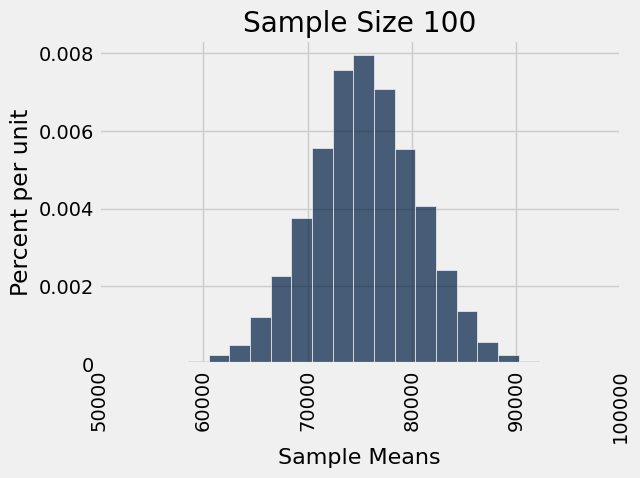

In [346]:
simulate_sample_mean(salaries, 'salary', 100, 10000) 
plt.xlim(50000, 100000);

**Question 5.3.** Simulate two sample means, one for a sample of 400 salaries and one for a sample of 625 salaries. In each case, perform 10,000 repetitions. Don't worry about the `plots.xlim` line – it just makes sure that all of the plots have the same x-axis. 

<!--
BEGIN QUESTION
name: q2_3
-->

Sample size:  400
Population mean: 75463.9181402
Average of sample means:  75492.4330507
Population SD: 51697.0349865
SD of sample means: 2612.67675281


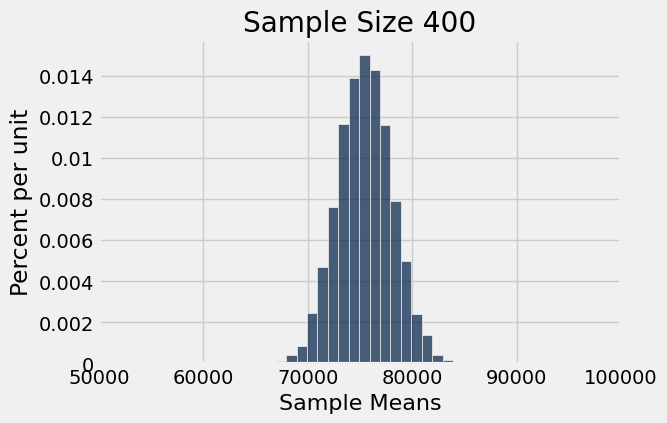



Sample size:  625
Population mean: 75463.9181402
Average of sample means:  75456.2548843
Population SD: 51697.0349865
SD of sample means: 2067.84853155


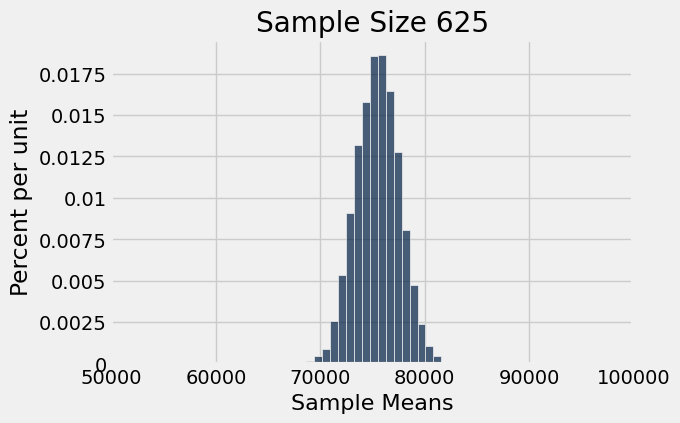

In [347]:
simulate_sample_mean(salaries, 'salary', 400, 10000)
plt.xlim(50000, 100000);
plt.show();
print('\n')
simulate_sample_mean(salaries, 'salary', 625, 10000)
plt.xlim(50000, 100000);
plt.show();

**Question 5.4.** Assign `q5_4` to an array of numbers corresponding to true statement(s) about the plots from 2.3.

1. We see the Central Limit Theorem (CLT) in action because the distributions of the sample means are bell-shaped.
2. We see the Law of Averages in action because the distributions of the sample means look like the distribution of the population.
3. One of the conditions for CLT is that we have to draw a small random sample with replacement from the population.
4. One of the conditions for CLT is that we have to draw a large random sample with replacement from the population.
5. One of the conditions for CLT is that the population must be normally distributed.
6. Both plots in 2.3 are roughly centered around the population mean.
7. Both plots in 2.3 are roughly centered around the mean of a particular sample.
8. The distribution of sample means for sample size 625 has less variability than the distribution of sample means for sample size 400.
9. The distribution of sample means for sample size 625 has more variability than the distribution of sample means for sample size 400.

<!--
BEGIN QUESTION
name: q2_4
-->

In [348]:
q5_4 = [1, 4, 6, 8]

Below, we'll look at what happens when we take an increasing number of resamples of a fixed sample size. Notice what number in the code changes, and what stays the same. How does the distribution of the resampled means change?

Sample size:  100
Population mean: 75463.9181402
Average of sample means:  75707.673209
Population SD: 51697.0349865
SD of sample means: 5363.60614944


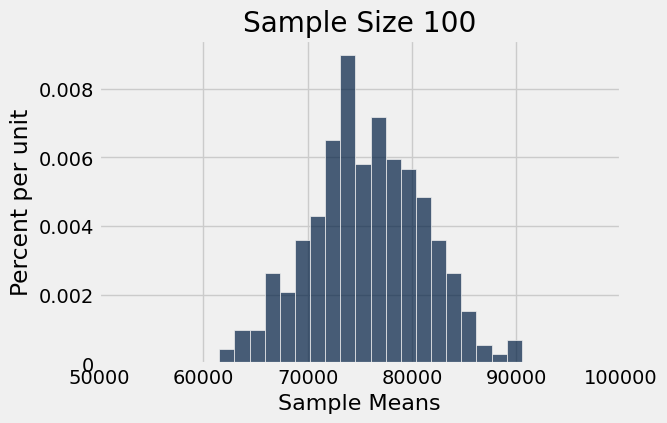

In [349]:
simulate_sample_mean(salaries, 'salary', 100, 500)
plt.xlim(50000, 100000);

Sample size:  100
Population mean: 75463.9181402
Average of sample means:  75409.2250378
Population SD: 51697.0349865
SD of sample means: 5095.91704425


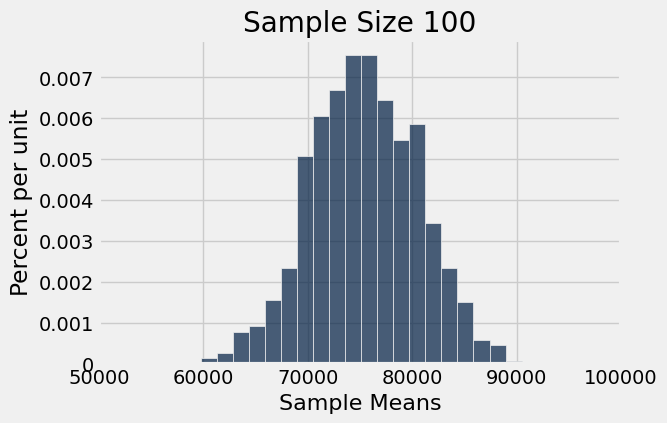

In [350]:
simulate_sample_mean(salaries, 'salary', 100, 1000)
plt.xlim(50000, 100000);

Sample size:  100
Population mean: 75463.9181402
Average of sample means:  75251.9008102
Population SD: 51697.0349865
SD of sample means: 5237.27785712


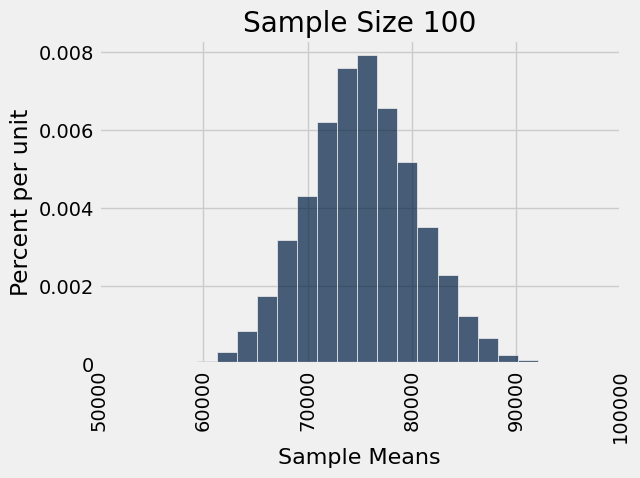

In [351]:
simulate_sample_mean(salaries, 'salary', 100, 5000)
plt.xlim(50000, 100000);

Sample size:  100
Population mean: 75463.9181402
Average of sample means:  75440.3110031
Population SD: 51697.0349865
SD of sample means: 5150.23302559


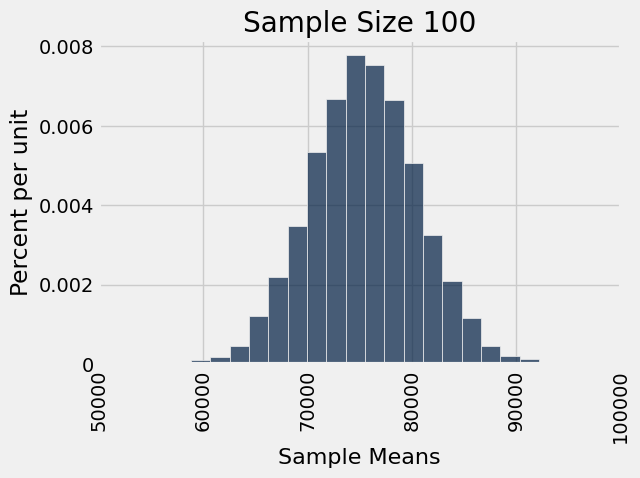

In [352]:
simulate_sample_mean(salaries, 'salary', 100, 10000)
plt.xlim(50000, 100000);

What did you notice about the distributions of sample means in the four histograms above? 

**Question 5.5.** Assign the variable `SD_of_sample_means` to the integer corresponding to your answer to the following question:

When I increase the number of resamples that I take, for a fixed sample size, the SD of my sample means will...

1. Increase
2. Decrease
3. Stay about the same
4. Vary widly


<!--
BEGIN QUESTION
name: q2_5
-->

In [353]:
SD_of_sample_means = 3

**Question 5.6.** Let's think about how the relationships between population SD, sample SD, and SD of sample means change with varying sample size. Which of the following is true? Assign the variable `pop_vs_sample` to an array of integer(s) that correspond to true statement(s).

1. Sample SD gets smaller with increasing sample size.
2. Sample SD gets larger with increasing sample size.
3. Sample SD becomes more consistent with population SD with increasing sample size.
4. SD of sample means gets smaller with increasing sample size.
5. SD of sample means gets larger with increasing sample size.
6. SD of sample means stays the same with increasing sample size.

<!--
BEGIN QUESTION
name: q2_6
-->

In [354]:
pop_vs_sample = [3, 4]

Run the following three cells multiple times and examine how the sample SD and the SD of sample means change with sample size.

The first histogram is of the sample; the second histogram is the distribution of sample means with that particular sample size. Adjust the bins as necessary.

Sample SD:  52848.6779429
Sample size:  10
Population mean: 75463.9181402
Average of sample means:  75508.003688
Population SD: 51697.0349865
SD of sample means: 16383.7742523


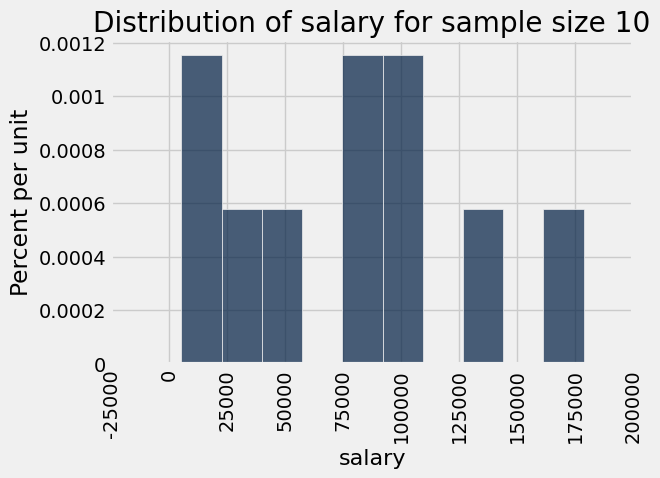

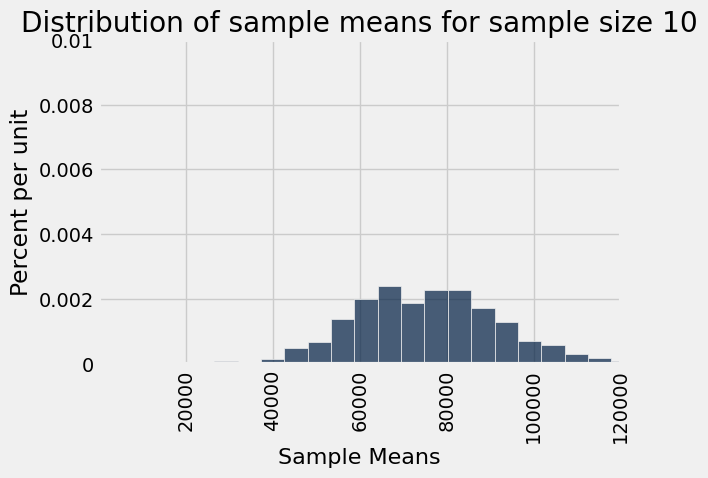

In [355]:
sample_10 = salaries.sample(10)
sample_10.hist("salary")
plt.title('Distribution of salary for sample size 10')
print("Sample SD: ", np.std(sample_10.column("salary")))
simulate_sample_mean(salaries, 'salary', 10, 1000)
plt.xlim(5,120000);
plt.ylim(0, .0001);
plt.title('Distribution of sample means for sample size 10');

Sample SD:  51244.1487909
Sample size:  200
Population mean: 75463.9181402
Average of sample means:  75471.2655513
Population SD: 51697.0349865
SD of sample means: 3721.79880846


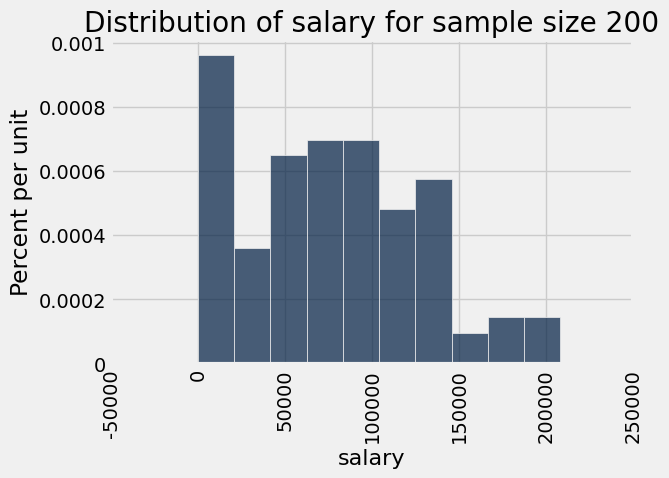

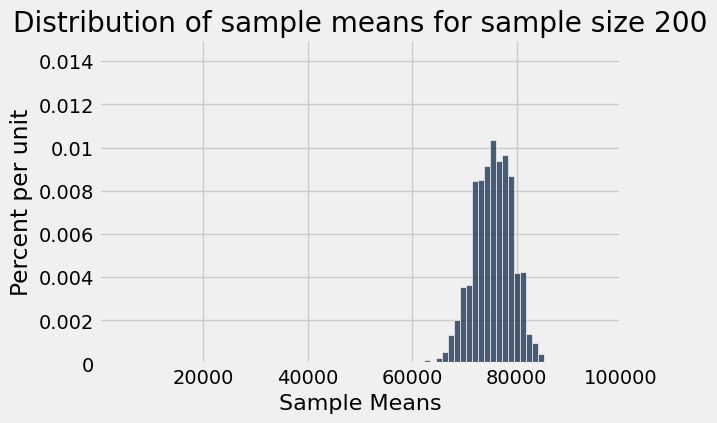

In [356]:
sample_200 = salaries.sample(200)
sample_200.hist("salary")
plt.title('Distribution of salary for sample size 200')
print("Sample SD: ", np.std(sample_200.column("salary")))
simulate_sample_mean(salaries, 'salary', 200, 1000)
plt.xlim(5,100000)
plt.ylim(0, .00015);
plt.title('Distribution of sample means for sample size 200');

Sample SD:  51697.8745477
Sample size:  1000
Population mean: 75463.9181402
Average of sample means:  75417.9086478
Population SD: 51697.0349865
SD of sample means: 1695.7580663


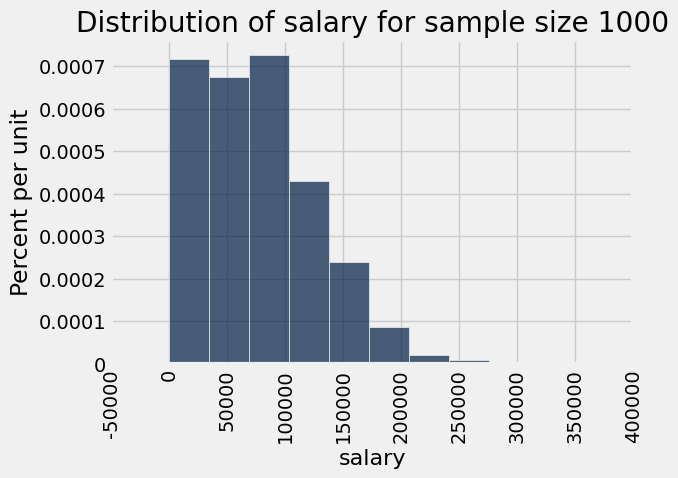

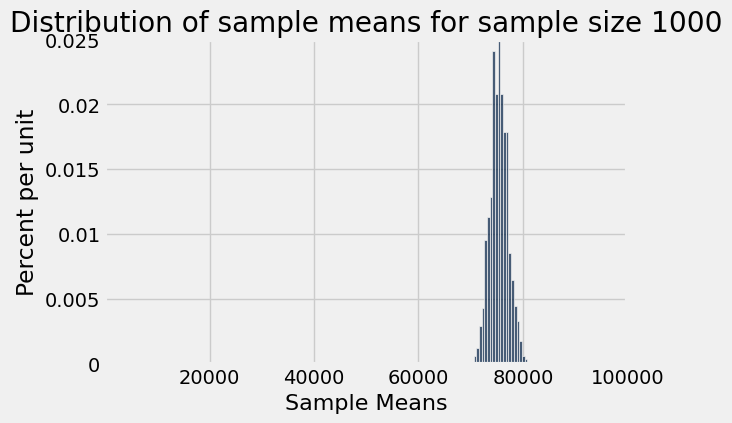

In [357]:
sample_1000 = salaries.sample(1000)
sample_1000.hist("salary")
plt.title('Distribution of salary for sample size 1000')
print("Sample SD: ", np.std(sample_1000.column("salary")))
simulate_sample_mean(salaries, 'salary', 1000, 1000)
plt.xlim(5,100000)
plt.ylim(0, .00025);
plt.title('Distribution of sample means for sample size 1000');

You should notice that the distribution of means gets narrower and spikier, and that the distribution of the sample increasingly looks like the distribution of the population as we get to larger sample sizes. 

Let's illustrate these trends. Below, you will see how the sample SD changes with respect to sample size (N). The blue line is the population SD.

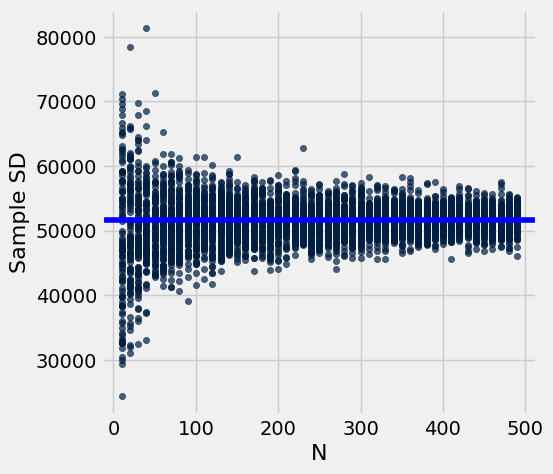

In [358]:
# Don't change this cell, just run it!
pop_sd = np.std(salaries.column('salary'))
sample_sds = make_array()
sample_sizes = make_array()
for i in np.arange(10, 500, 10):
    sample_sds = np.append(sample_sds, [np.std(salaries.sample(i).column("salary")) for d in np.arange(100)])
    sample_sizes = np.append(sample_sizes, np.ones(100) * i)
Table().with_columns("Sample SD", sample_sds, "N", sample_sizes).scatter("N", "Sample SD")
matplotlib.pyplot.axhline(y=pop_sd, color='blue', linestyle='-');

The next cell shows how the SD of the sample means changes relative to the sample size (N).

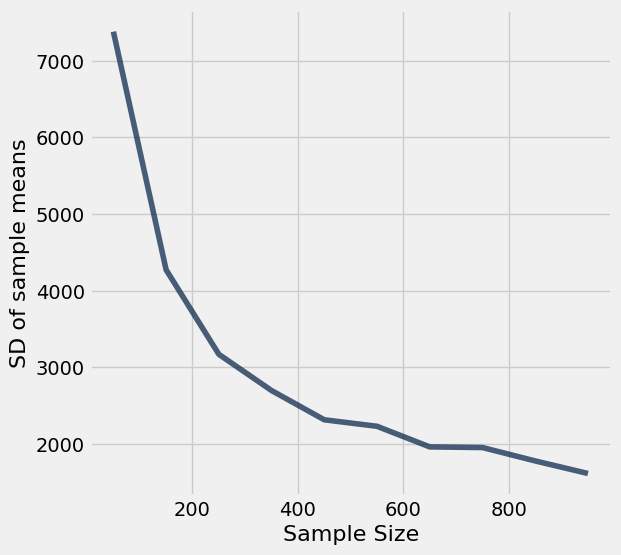

In [359]:
# Don't change this cell, just run it!
def sample_means(sample_size):
    means = make_array()
    for i in np.arange(1000):
        sample = salaries.sample(sample_size).column('salary')
        means = np.append(means, np.mean(sample))
    return np.std(means)

sample_mean_SDs = make_array()
for i in np.arange(50, 1000, 100):
    sample_mean_SDs = np.append(sample_mean_SDs, sample_means(i))
Table().with_columns("SD of sample means", sample_mean_SDs, "Sample Size", np.arange(50, 1000, 100))\
.plot("Sample Size", "SD of sample means")

From these two plots, we can see that the SD of our *sample* approaches the SD of our population as our sample size increases, but the SD of our *sample means* (in other words, the variability of the sample mean) decreases as our sample size increases.

**Question 2.7.** Is there a relationship between the sample size and the standard deviation of the sample mean? Assign `q2_7` to the number corresponding to the statement that answers this question.

1. The SD of the sample means is inversely proportional to the square root of sample size.
2. The SD of the sample means is directly proportional to the square root of sample size.

<!--
BEGIN QUESTION
name: q2_7
-->

In [360]:
q5_7 = ...

Throughout this lab, we have been taking many random samples from a population. However, all of these principles hold for bootstrapped resamples from a single sample. If your original sample is relatively large, all of your re-samples will also be relatively large, and so the SD of resampled means will be relatively small. 

In order to change the variability of your sample mean, you’d have to change the size of the original sample from which you are taking bootstrapped resamples.

## Submission

To submit your assignment, please download your notebook as a .ipynb file and submit to Canvas. You can do so by navigating to the toolbar at the top of this page, clicking File > Download as... > Notebook (.ipynb) or HTML (.html). Then, upload both files under "Lab #05".